# Лабораторная работа №3

Исследование распределений и моментов, связанных с преобразованием случайных величин.

Цель: Применение распределений для преобразования случайных величин.

## Шаг 1: Генерация выборки точек внутри круга двумя способами
1. **Метод 1**: Генерация точек в квадрате и фильтрация
2. **Метод 2**: Генерация точек через случайные угол и радиус

In [12]:
# Генерация точек в квадрате для метода 1
x_square = np.random.uniform(-R, R, sample_size * 2)
y_square = np.random.uniform(-R, R, sample_size * 2)

# Фильтрация точек, чтобы остались только те, что внутри окружности
mask = x_square**2 + y_square**2 <= R**2
x_circle_1 = x_square[mask][:sample_size]
y_circle_1 = y_square[mask][:sample_size]

In [13]:
# Генерация точек с использованием случайного угла и радиуса для метода 2
angles = np.random.uniform(0, 2 * np.pi, sample_size)
radii = np.sqrt(np.random.uniform(0, R**2, sample_size))
x_circle_2 = radii * np.cos(angles)
y_circle_2 = radii * np.sin(angles)

## Шаг 2: Визуализация выборки точек

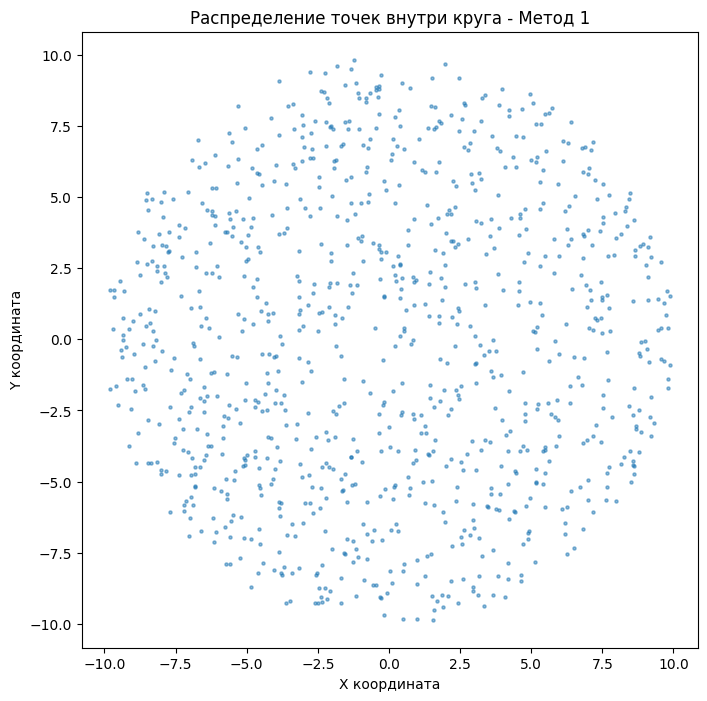

In [14]:
# Визуализация для метода 1
plt.figure(figsize=(8, 8))
plt.scatter(x_circle_1, y_circle_1, s=5, alpha=0.5)
plt.title('Распределение точек внутри круга - Метод 1')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

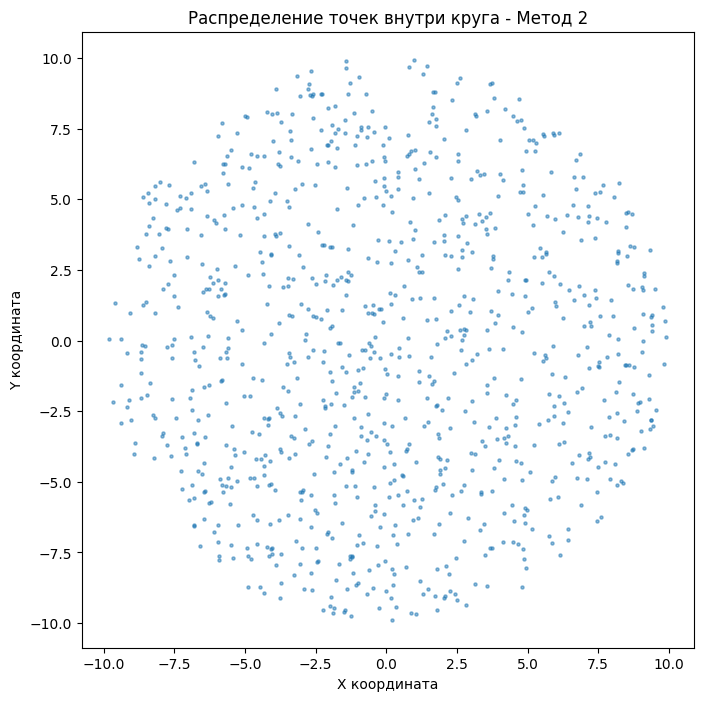

In [15]:
# Визуализация для метода 2
plt.figure(figsize=(8, 8))
plt.scatter(x_circle_2, y_circle_2, s=5, alpha=0.5)
plt.title('Распределение точек внутри круга - Метод 2')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Шаг 3: Расчет выборочных средних и дисперсий

In [16]:
# Вычисление среднего и дисперсии для метода 1
mean_x1, mean_y1 = np.mean(x_circle_1), np.mean(y_circle_1)
var_x1, var_y1 = np.var(x_circle_1), np.var(y_circle_1)

# Вычисление среднего и дисперсии для метода 2
mean_x2, mean_y2 = np.mean(x_circle_2), np.mean(y_circle_2)
var_x2, var_y2 = np.var(x_circle_2), np.var(y_circle_2)

# Вывод результатов
print('Метод 1:')
print(f'Средние координаты: ({mean_x1:.2f}, {mean_y1:.2f})')
print(f'Дисперсии координат: X={var_x1:.2f}, Y={var_y1:.2f}\n')

print('Метод 2:')
print(f'Средние координаты: ({mean_x2:.2f}, {mean_y2:.2f})')
print(f'Дисперсии координат: X={var_x2:.2f}, Y={var_y2:.2f}')

Метод 1:
Средние координаты: (-0.17, -0.12)
Дисперсии координат: X=26.08, Y=25.02

Метод 2:
Средние координаты: (0.01, -0.23)
Дисперсии координат: X=23.90, Y=24.67


## Шаг 4: Построение графиков плотности распределения расстояния




1. Плотность распределения расстояния до фиксированной точки \((20, 0)\)
2. Плотность распределения расстояния между двумя случайными точками

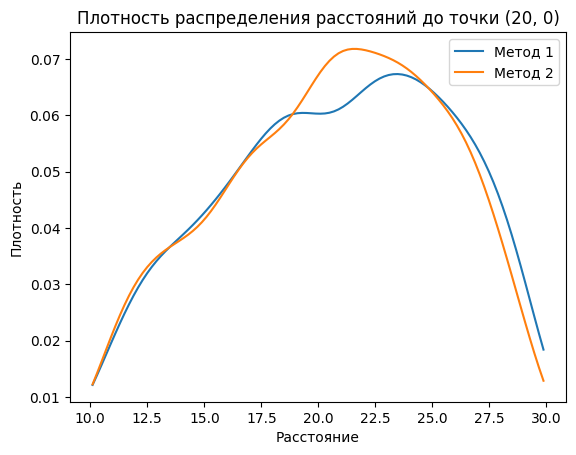

In [17]:
# Расчет расстояний до точки (20, 0) для обеих выборок
distances_to_fixed_1 = np.sqrt((x_circle_1 - fixed_point[0])**2 + y_circle_1**2)
distances_to_fixed_2 = np.sqrt((x_circle_2 - fixed_point[0])**2 + y_circle_2**2)

# Оценка плотности распределения
kde_fixed_1 = gaussian_kde(distances_to_fixed_1)
kde_fixed_2 = gaussian_kde(distances_to_fixed_2)

# Плотности
x_vals = np.linspace(min(distances_to_fixed_1.min(), distances_to_fixed_2.min()),
                     max(distances_to_fixed_1.max(), distances_to_fixed_2.max()), 100)

plt.figure()
plt.plot(x_vals, kde_fixed_1(x_vals), label='Метод 1')
plt.plot(x_vals, kde_fixed_2(x_vals), label='Метод 2')
plt.title('Плотность распределения расстояний до точки (20, 0)')
plt.xlabel('Расстояние')
plt.ylabel('Плотность')
plt.legend()
plt.show()

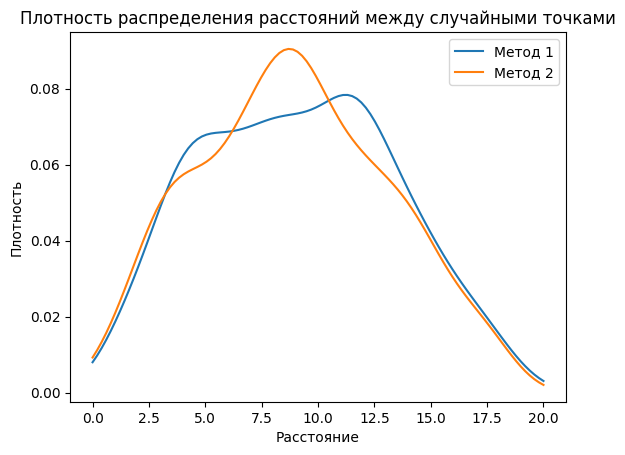

In [18]:
# Генерация случайных пар точек и расчет расстояний между ними
indices_1 = np.random.choice(sample_size, (sample_size // 2, 2), replace=False)
distances_between_points_1 = np.sqrt(
    (x_circle_1[indices_1[:, 0]] - x_circle_1[indices_1[:, 1]])**2 +
    (y_circle_1[indices_1[:, 0]] - y_circle_1[indices_1[:, 1]])**2
)

indices_2 = np.random.choice(sample_size, (sample_size // 2, 2), replace=False)
distances_between_points_2 = np.sqrt(
    (x_circle_2[indices_2[:, 0]] - x_circle_2[indices_2[:, 1]])**2 +
    (y_circle_2[indices_2[:, 0]] - y_circle_2[indices_2[:, 1]])**2
)

# Оценка плотности распределения
kde_points_1 = gaussian_kde(distances_between_points_1)
kde_points_2 = gaussian_kde(distances_between_points_2)

# Плотности
x_vals = np.linspace(0, R * 2, 100)

plt.figure()
plt.plot(x_vals, kde_points_1(x_vals), label='Метод 1')
plt.plot(x_vals, kde_points_2(x_vals), label='Метод 2')
plt.title('Плотность распределения расстояний между случайными точками')
plt.xlabel('Расстояние')
plt.ylabel('Плотность')
plt.legend()
plt.show()

#Выводы
1.Генерация выборок: Оба метода генерации точек дают равномерное распределение внутри круга.

2.Средние и дисперсии: Средние координаты примерно равны нулю, что логично, так как точки равномерно распределены.

3.Плотность распределений: Плотность расстояния до фиксированной точки и между случайными точками также демонстрирует симметрию и логичное распределение.